### Step 1: Read patient-data.csv

In [1]:
import pandas as pd
import numpy as np

# Read the CSV file
df = pd.read_csv('patient-data.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2371 entries, 0 to 2370
Data columns (total 25 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   p01      2371 non-null   float64
 1   p02      2371 non-null   float64
 2   p03      2370 non-null   float64
 3   p04      2370 non-null   float64
 4   p05      2370 non-null   float64
 5   p06      2370 non-null   float64
 6   p07      2370 non-null   float64
 7   p08      2370 non-null   float64
 8   p09      2370 non-null   float64
 9   p10      2370 non-null   float64
 10  p11      2370 non-null   float64
 11  p12      2370 non-null   float64
 12  p13      2370 non-null   float64
 13  p14      2370 non-null   float64
 14  p15      2369 non-null   float64
 15  p16      2369 non-null   float64
 16  p17      2370 non-null   float64
 17  p18      2370 non-null   float64
 18  p19      2370 non-null   float64
 19  p20      2370 non-null   float64
 20  p21      2370 non-null   float64
 21  p22      2370 

### Step 2: Delete rows with missing data

In [2]:
cleaned_data = df.dropna()
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2367 entries, 0 to 2370
Data columns (total 25 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   p01      2367 non-null   float64
 1   p02      2367 non-null   float64
 2   p03      2367 non-null   float64
 3   p04      2367 non-null   float64
 4   p05      2367 non-null   float64
 5   p06      2367 non-null   float64
 6   p07      2367 non-null   float64
 7   p08      2367 non-null   float64
 8   p09      2367 non-null   float64
 9   p10      2367 non-null   float64
 10  p11      2367 non-null   float64
 11  p12      2367 non-null   float64
 12  p13      2367 non-null   float64
 13  p14      2367 non-null   float64
 14  p15      2367 non-null   float64
 15  p16      2367 non-null   float64
 16  p17      2367 non-null   float64
 17  p18      2367 non-null   float64
 18  p19      2367 non-null   float64
 19  p20      2367 non-null   float64
 20  p21      2367 non-null   float64
 21  p22      2367 non-n

### Step 3: Normalize the columns and create the common-scale Box-Plot

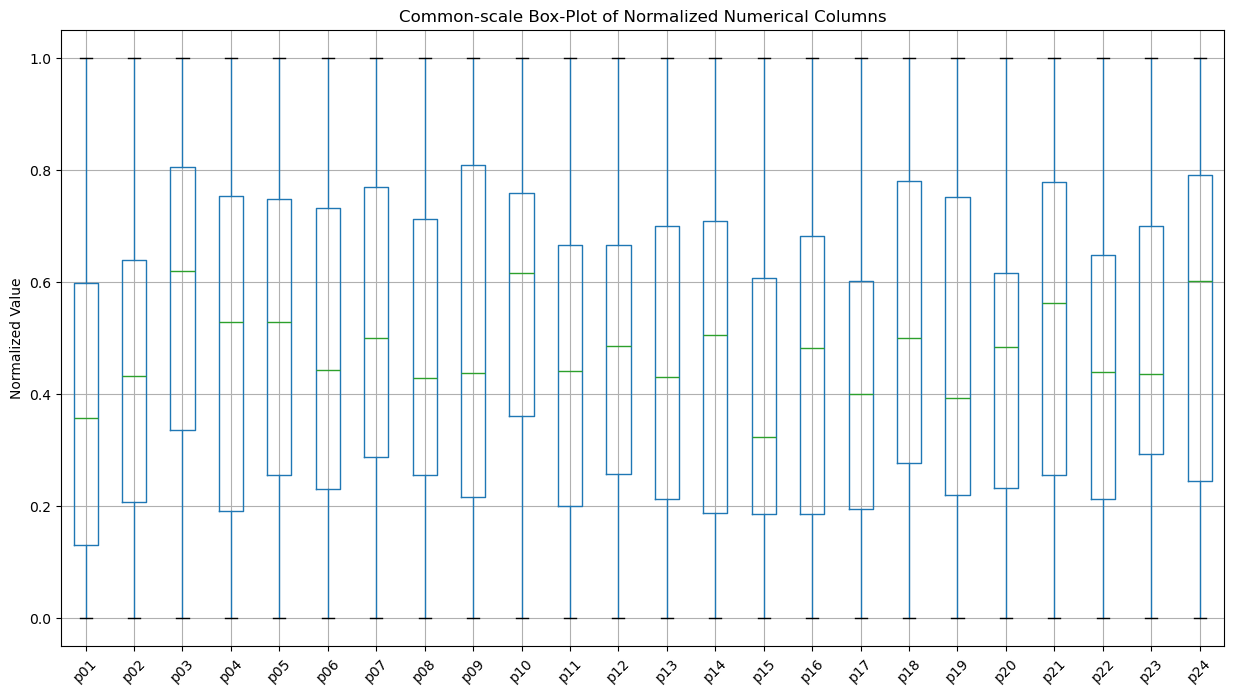

In [3]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

numerical_cols = cleaned_data.columns.drop('Ailment')
scaler = MinMaxScaler()
df_normalized = cleaned_data.copy()
df_normalized[numerical_cols] = scaler.fit_transform(cleaned_data[numerical_cols])

plt.figure(figsize=(15, 8))
df_normalized.boxplot(column=list(numerical_cols))
plt.title('Common-scale Box-Plot of Normalized Numerical Columns')
plt.ylabel('Normalized Value')
plt.xticks(rotation=45)
plt.show()

### Step 4: Create Logistic Regression on 'df_normalized' data

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split data into features (X) and target (y)
X = df_normalized.drop('Ailment', axis=1)
y = df_normalized['Ailment']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Training metrics
print('--- Training Metrics ---')
print(f'Accuracy: {accuracy_score(y_train, y_train_pred)}')
print(classification_report(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))

# Testing metrics
print('--- Testing Metrics ---')
print(f'Accuracy: {accuracy_score(y_test, y_test_pred)}')
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

--- Training Metrics ---
Accuracy: 0.9920760697305864
               precision    recall  f1-score   support

       Anemia       0.99      1.00      0.99       494
     Diabetes       1.00      1.00      1.00       435
      Healthy       0.99      1.00      0.99       436
Heart Disease       0.00      0.00      0.00        15
     Thalasse       1.00      1.00      1.00       411
     Thromboc       0.99      1.00      1.00       102

     accuracy                           0.99      1893
    macro avg       0.83      0.83      0.83      1893
 weighted avg       0.98      0.99      0.99      1893

[[494   0   0   0   0   0]
 [  0 435   0   0   0   0]
 [  0   0 436   0   0   0]
 [  5   2   6   0   1   1]
 [  0   0   0   0 411   0]
 [  0   0   0   0   0 102]]
--- Testing Metrics ---
Accuracy: 0.989451476793249
               precision    recall  f1-score   support

       Anemia       0.98      1.00      0.99       127
     Diabetes       0.99      1.00      1.00       104
      Health

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels wi